In [46]:
#Próba decyzji, czy pójść na do teatru na  komedie, czy nie.
#Dane zawierają informację o aktorze oraz informacje o tym, czy osoba podejmująca decyzję była w przeszłości na przedstawieniu z tym aktorem

In [44]:
import pandas as pd
df=pd.read_csv('./data/data_comedy.csv')

In [30]:
from mlxtend import plotting

In [5]:
df.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES


In [6]:
#Transformacja do wartości numerycznych kolumny Nationality
df['Nationality'].value_counts()


UK     5
USA    4
N      4
Name: Nationality, dtype: int64

In [7]:
df['Nationality']=df['Nationality'].replace('UK', 0)
df['Nationality']=df['Nationality'].replace('USA', 1)
df['Nationality']=df['Nationality'].replace('N', 2)

In [8]:
df['Nationality'].value_counts()

0    5
1    4
2    4
Name: Nationality, dtype: int64

In [9]:
#Transformacja do wartości numerycznych kolumny Nationality
df['Go'].value_counts()

YES    7
NO     6
Name: Go, dtype: int64

In [10]:
df['Go']=df['Go'].replace('YES', 0)
df['Go']=df['Go'].replace('NO', 1)

In [11]:
df['Go'].value_counts()

0    7
1    6
Name: Go, dtype: int64

In [12]:
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,1
1,42,12,4,1,1
2,23,4,6,2,1
3,52,4,4,1,1
4,43,21,8,1,0
5,44,14,5,0,1
6,66,3,7,2,0
7,35,14,9,0,0
8,52,13,7,2,0
9,35,5,9,2,0


In [ ]:
#oddzielić kolumny cech od kolumny docelowej .
#Kolumny cech na ich podstawie próbujemy przewidzieć
#kolumna docelowa to kolumna z wartościami, które próbujemy przewidzieć.

In [14]:
df.columns

Index(['Age', 'Experience', 'Rank', 'Nationality', 'Go'], dtype='object')

In [15]:
cechy=['Age', 'Experience', 'Rank', 'Nationality']
#chcemy wiedzieć czyiść czy nie iść, dlatego usunięto kolumne 'Go' -> która  w tym wypadku jest kolumną docelową

In [16]:
X=df[cechy]
y=df['Go']

In [17]:
X

,Age,Experience,Rank,Nationality
0,36,10,9,0
1,42,12,4,1
2,23,4,6,2
3,52,4,4,1
4,43,21,8,1
5,44,14,5,0
6,66,3,7,2
7,35,14,9,0
8,52,13,7,2
9,35,5,9,2


In [18]:
y

0     1
1     1
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     0
10    1
11    0
12    0
Name: Go, dtype: int64

In [35]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [20]:
import matplotlib.pyplot as plt

In [36]:
tree= DecisionTreeClassifier(random_state=0, criterion='gini') #z domyślnymi parametrami
tree.fit(X, y)

DecisionTreeClassifier(random_state=0)

[Text(0.3333333333333333, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [7, 6]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5, 0.625, 'Experience <= 9.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6666666666666666, 0.375, 'Experience <= 11.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

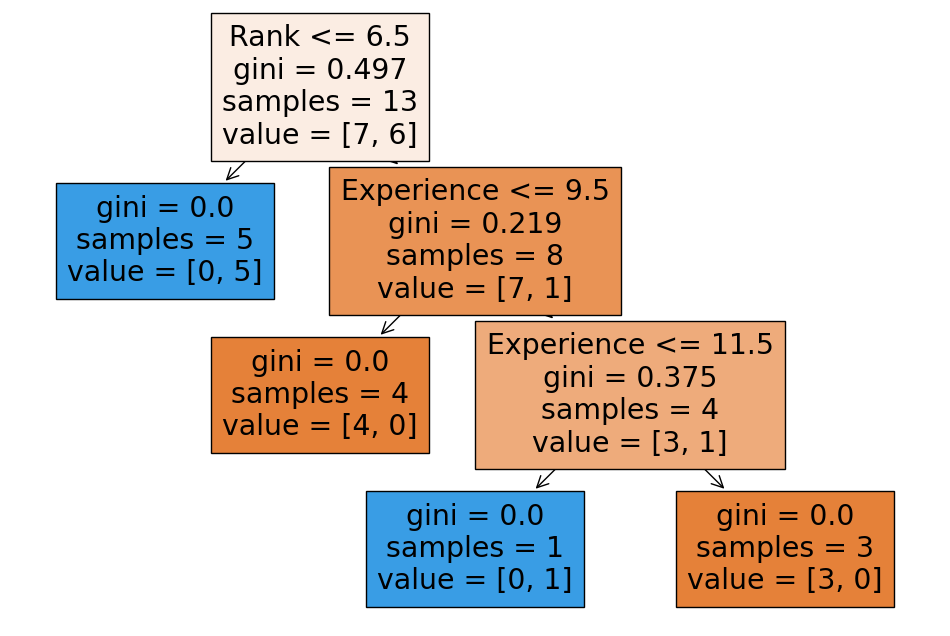

In [40]:
plt.figure(figsize = (12, 8))

plot_tree(tree,feature_names = cechy,filled=True)

In [43]:
cechy=['Age', 'Experience', 'Rank', 'Nationality']
print("[1] oznacza 'GO' czyli iść")
print("[0] oznacza 'NO'czyli nie iść")
print(f'Wynik predykcji {tree.predict([[40, 10, 7, 1]])}')

[1] oznacza 'GO' czyli iść
[0] oznacza 'NO'czyli nie iść
Wynik predykcji [1]


C:\Users\Hp\anaconda3\envs\drzewa\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
